<a href="https://colab.research.google.com/github/OseiasBeu/Data-Science/blob/master/PrevendoChurn_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline


In [4]:
dados = pd.read_csv('https://raw.githubusercontent.com/OseiasBeu/Data-Science/master/DataSets/Customer-Churn_datasets/Customer-Churn_tratado.csv')

In [5]:
dados.shape

(7043, 18)

In [6]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.3 - Diferentes Variáveis

In [7]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

In [8]:
dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [9]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

In [10]:
#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [11]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


1.5 - Definição Formal
Informações para classificação:

 X = inputs (dados de entrada)

Y  = outputs (dados de saída)

In [12]:
#DICA
pd.set_option('display.max_columns', 39)

In [13]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [14]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Novos pares de informações = (, )

## Balanceamento dos dados

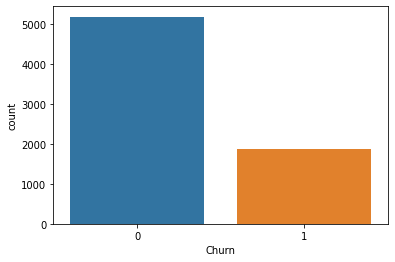

In [15]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [16]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [17]:

#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [18]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [19]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [20]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [21]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


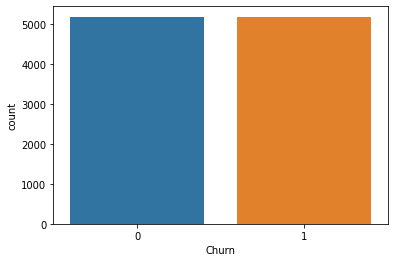

In [22]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [23]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [24]:
import numpy as np

In [25]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [26]:
# calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

In [27]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn',axis=1)
y = dados_final['Churn']

In [28]:
#Biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [29]:
norm = StandardScaler()

In [30]:
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [31]:
X_maria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=X.columns))
X_maria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

In [32]:
a = X_maria_normalizado
b = X_normalizado[0]

In [33]:
np.sqrt(np.sum(np.square(a-b)))

9.576326657950807

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_treino, X_teste,y_treino, y_teste = train_test_split(X_normalizado,y,test_size=0.3,random_state=123)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(metric='euclidean')

In [38]:
knn.fit(X_treino,y_treino)

KNeighborsClassifier(metric='euclidean')

In [39]:
predito_knn = knn.predict(X_teste)

In [40]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

## 3.3 Treino e Teste

In [41]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [42]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [43]:
#Utilizando o a mediana porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.4461759755508453

In [44]:
#Biblioteca para criar o modelo de ML - BernoulliNB
from sklearn.naive_bayes import BernoulliNB

In [45]:
#criar o modelo
bnb = BernoulliNB(binarize=-0.44)

In [46]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [47]:
predito_bnb = bnb.predict(X_teste)

In [48]:
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

In [49]:
predito_knn  == predito_bnb

array([ True,  True,  True, ..., False,  True,  True])

## Implementando Modelo de Árvore de Decisão

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [52]:
dtc.fit(X_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [53]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [54]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [55]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# Validando Modelos:

## Matriz de Confusão:

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_teste,predito_knn))

[[1241  328]
 [ 247 1289]]


In [58]:
print(confusion_matrix(y_teste,predito_bnb))

[[1050  519]
 [ 242 1294]]


In [59]:
print(confusion_matrix(y_teste,predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


## Acurácia

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print(accuracy_score(y_teste,predito_knn))

0.8148148148148148


In [62]:
print(accuracy_score(y_teste,predito_bnb))

0.7549114331723027


In [63]:
print(accuracy_score(y_teste,predito_ArvoreDecisao))

0.8077294685990338


## Precisão

In [64]:
from sklearn.metrics import precision_score

In [65]:
print(precision_score(y_teste,predito_knn))

0.7971552257266543


In [66]:
print(precision_score(y_teste,predito_bnb))

0.7137341423055709


In [67]:
print(precision_score(y_teste,predito_ArvoreDecisao))

0.7973400886637112


## Recall

In [68]:
from sklearn.metrics import recall_score

In [69]:
print(recall_score(y_teste,predito_knn))

0.8391927083333334


In [70]:
print(recall_score(y_teste,predito_bnb))

0.8424479166666666


In [71]:
print(recall_score(y_teste,predito_ArvoreDecisao))

0.8196614583333334


# Escolhendo o melhor modelo

In [74]:
print(f'''
PRECISÃO DOS MODELOS:
KNN: {precision_score(y_teste,predito_knn)}
BNB: {precision_score(y_teste,predito_bnb)}
Arvore de Decisão: {precision_score(y_teste,predito_ArvoreDecisao)}''')


PRECISÃO DOS MODELOS:
KNN: 0.7971552257266543
BNB: 0.7137341423055709
Arvore de Decisão: 0.7973400886637112
